# Introducción a Python

## El paquete Pandas

### Estadística descriptiva y visualización

Pandas ofrece un conjunto de funciones para hacer cálculos estadísticos básicos.

In [1]:
import pandas as pd

In [2]:
autos = pd.read_csv('auto.csv')

In [3]:
autos.head()

,make,price,mpg,repairs,weight,length,foreign
0,AMC,4099,22,3,2930,186,0
1,AMC,4749,17,3,3350,173,0
2,AMC,3799,22,3,2640,168,0
3,Audi,9690,17,5,2830,189,1
4,Audi,6295,23,3,2070,174,1


Algunas estadísticas sobre el conjunto de datos pueden obtenerse usando el método `describe()`

In [4]:
autos.describe()

,price,mpg,repairs,weight,length,foreign
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6651.730769,20.923077,3.269231,3099.230769,190.076923,0.269231
std,3371.119809,4.757504,0.777570,695.079409,18.170136,0.452344
min,3299.000000,14.000000,2.000000,2020.000000,163.000000,0.000000
25%,4465.750000,17.250000,3.000000,2642.500000,173.250000,0.000000
50%,5146.500000,21.000000,3.000000,3200.000000,191.000000,0.000000
75%,8053.500000,23.000000,4.000000,3610.000000,203.000000,0.750000
max,15906.000000,35.000000,5.000000,4330.000000,222.000000,1.000000


In [5]:
# Se selecciona la columna mpg
autos.mpg.describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
Name: mpg, dtype: float64

In [6]:
# Notación equivalenete a la anterior
autos['mpg'].describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
Name: mpg, dtype: float64

In [7]:
# Calculo de la media
autos[['price','mpg', 'repairs']].median(axis=0, skipna=True, numeric_only=False)

price      5146.5
mpg          21.0
repairs       3.0
dtype: float64

Pandas tiene integrada la funcionalidad de graficación de datos como método en del objeto `DataFrames`:

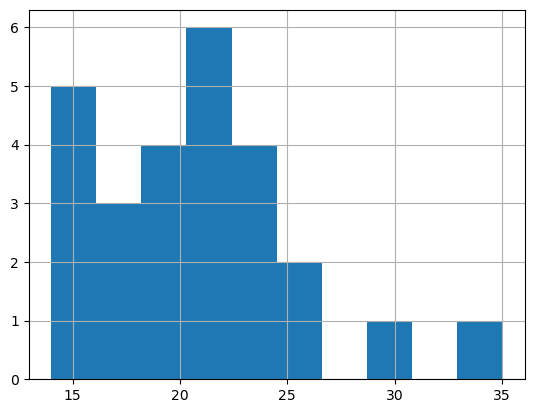

In [8]:
# Gráfica del histograma
autos.mpg.hist();

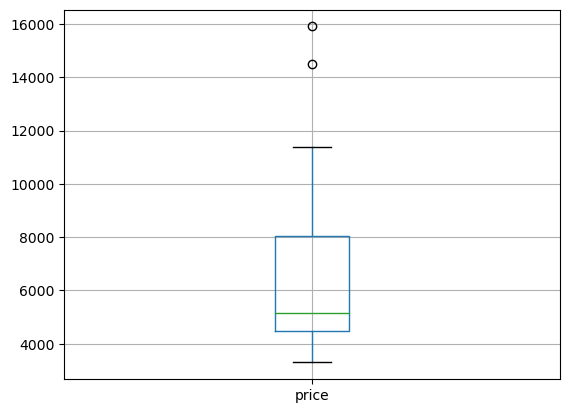

In [9]:
# box plot
autos.boxplot(column='price');

### El paquete Seaborn

El análisis estadístico básico proporcionado por Pandas puede complementarse usando la librería para la visualización de datos estadísticos **Seaborn**. El paquete Seaborn es una libreria de visialización para Python el cual provee una interfaz de alto nivel para crear gráficos con diseño atractivo que aumentan la expresividad de los gráficos estadísticos convencionales. 

In [10]:
from IPython.display import IFrame
IFrame('https://seaborn.pydata.org/', width='100%', height=350)

In [11]:
import numpy as np

In [12]:
# cargar archivo de datos de titanic.csv
titanic = pd.read_csv('titanic.csv')

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Histogramas

In [14]:
import seaborn as sns

#from scipy import stats

In [15]:
# seaborn settings
sns.set(color_codes = True)
sns.set_theme(style="darkgrid")

In [16]:
# dropna() devuelve una serie sin
# valores nulos en el campo Age
age_titanic = titanic.Age.dropna()

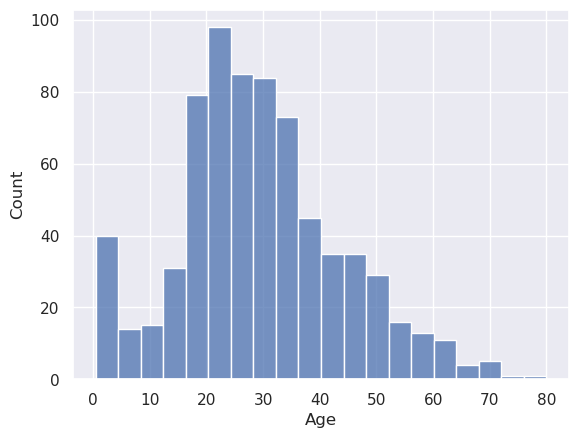

In [17]:
sns.histplot(age_titanic);

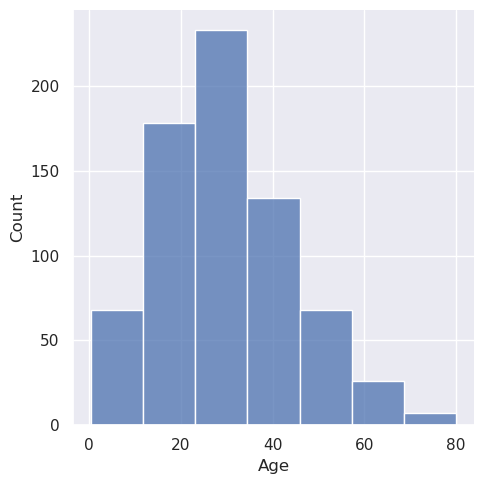

In [18]:
sns.displot(age_titanic, bins=7);

In [19]:
ac_titanic = titanic[["Age", "Pclass", "Sex"]]
ac_titanic.head()

,Age,Pclass,Sex
0,22.0,3,male
1,38.0,1,female
2,26.0,3,female
3,35.0,1,female
4,35.0,3,male


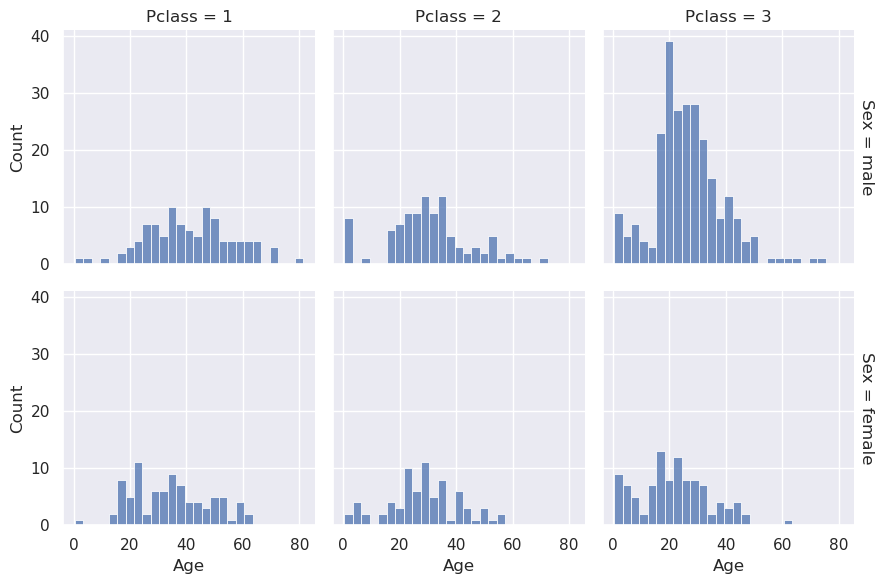

In [20]:
sns.displot(
    ac_titanic, x="Age", col="Pclass", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True));

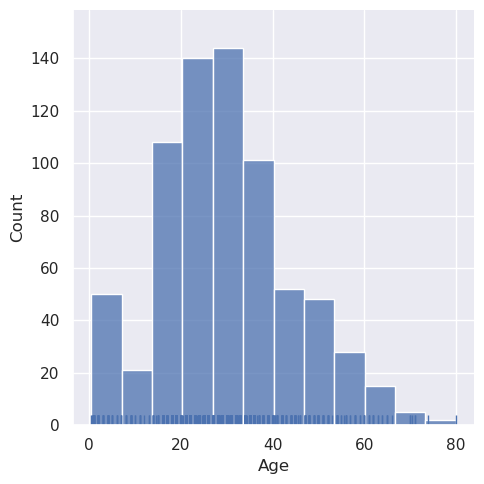

In [21]:
sns.displot(age_titanic, bins = 12, kde=False, rug=True);

In [22]:
# cargar archivo de datos de mlbsalaries.csv
mlb = pd.read_csv('mlbsalaries.csv')

In [23]:
mlb.head()

,Year,Player,Salary,Position,Team
0,1988,Mike Witt,1400000,Pitcher,Los Angeles Angels
1,1988,George Hendrick,989333,Outfielder,Los Angeles Angels
2,1988,Chili Davis,950000,Outfielder,Los Angeles Angels
3,1988,Brian Downing,900000,Designated Hitter,Los Angeles Angels
4,1988,Bob Boone,883000,Catcher,Los Angeles Angels


In [24]:
mlb_salary = mlb.Salary.dropna()

In [25]:
import matplotlib.pyplot as plt

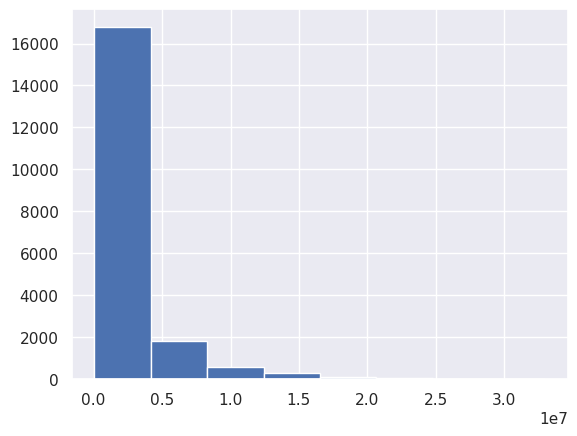

In [30]:
plt.hist(mlb_salary, 8);

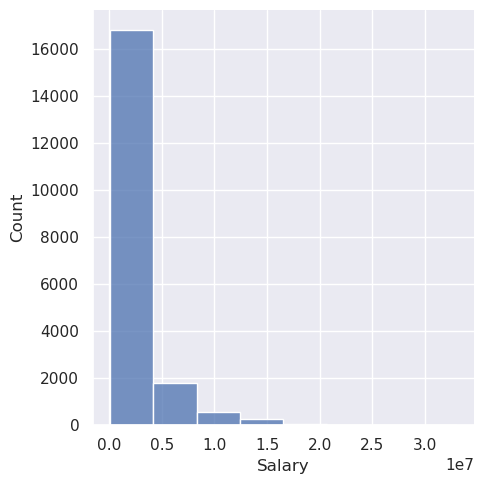

In [34]:
sns.displot(mlb_salary, bins = 8);

In [31]:
server = pd.read_csv('serverdata.csv')

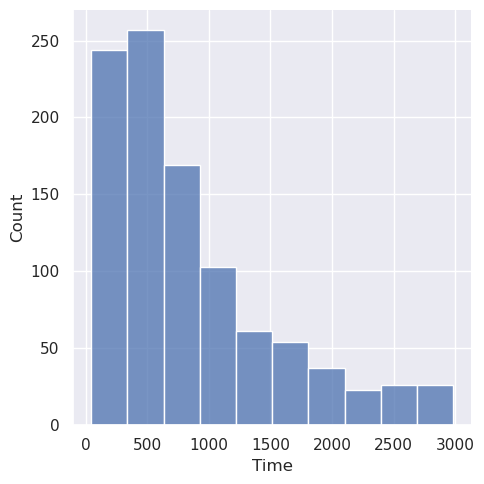

In [35]:
sns.displot(server.Time.dropna(), bins = 10);

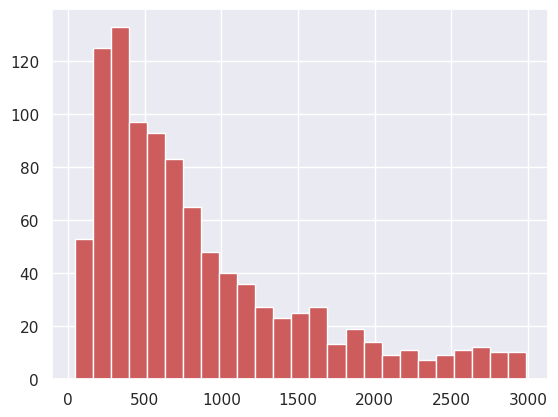

In [36]:
# histograma con pyplot usando
# configuración de seaborn
plt.hist(server.Time, 25, color=sns.desaturate('indianred', 1));

## Box-plot

Esta gráfica proporcionan una visión general de la simetría de la distribución de los datos.

Un box-plot (también conocido como gráfico de caja y bigotes) es un modo práctico para mostrar grupos de datos numéricos, como:
* Valor mínimo y valor máximo
* Cuartil superior y cuartil inferior
* Valores de la mediana
* Valores atípicos y valores extremos


In [20]:
sns.set_context(rc={"figure.figsize":(20,10)})

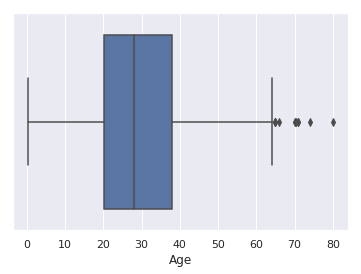

In [21]:
sns.boxplot(titanic.Age.dropna());

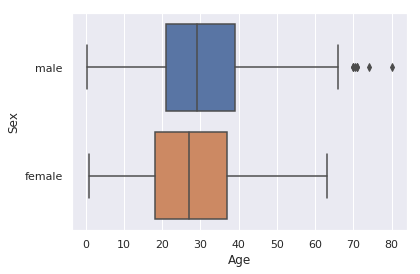

In [22]:
sns.boxplot(titanic.Age, titanic.Sex);

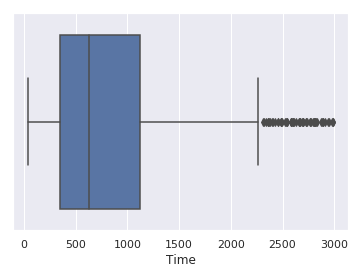

In [23]:
sns.boxplot(server.Time);

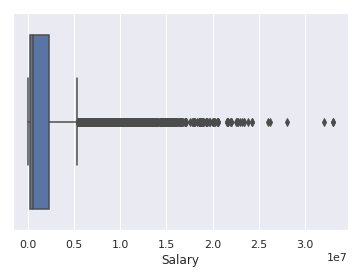

In [24]:
sns.boxplot(mlb.Salary)

## Kernel Density Estimate Plot

La estimación de la densidad del núcleo no es un procedimiento familiar, pero puede ser una herramienta útil para trazar la forma de una distribución. Al igual que el histograma, los gráficos de KDE codifican la densidad de las observaciones en un eje con la altura a lo largo del otro eje.

In [25]:
x = titanic.Age.dropna()

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


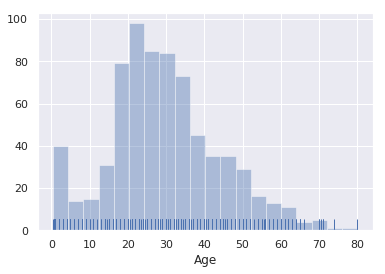

In [26]:
sns.distplot(x, kde=False, rug=True);

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


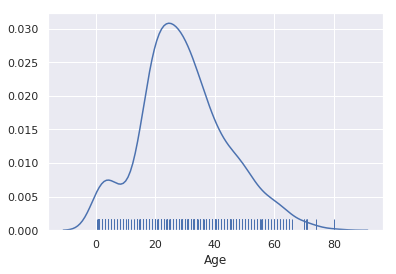

In [27]:
sns.distplot(x, hist=False, rug=True);

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


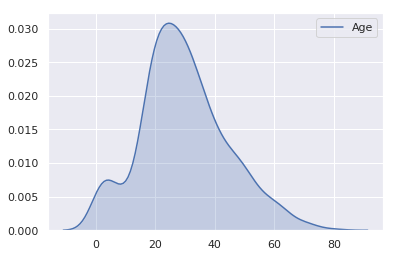

In [28]:
sns.kdeplot(x, shade=True);

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


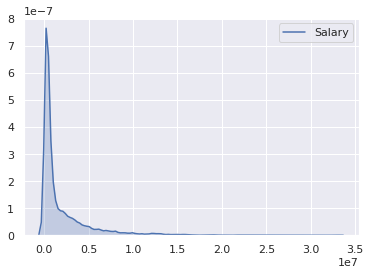

In [29]:
sns.kdeplot(mlb.Salary.dropna(), shade=True);

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


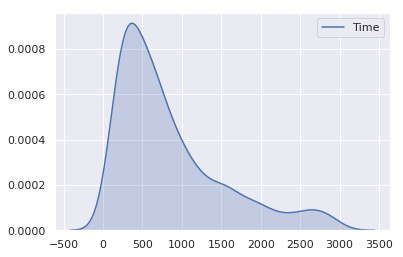

In [30]:
sns.kdeplot(server.Time.dropna(), shade=True);

## Violin Plot

Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.

Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos.

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


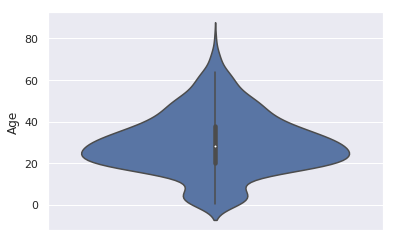

In [31]:
sns.violinplot(titanic.Age.dropna(), orient="v");

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


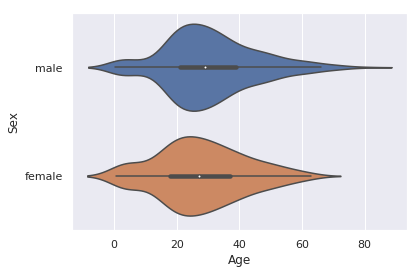

In [32]:
sns.violinplot(titanic.Age.dropna(), titanic.Sex);

In [ ]:
sns.violinplot(mlb.Salary, orient="v");

## Cumulative Distribution Function

La función de distribución (acumulada) de una variable aleatoria $X$, evaluada en $x$, es la probabilidad de que $X$ tome un valor menor o igual que $x$: $$F(x)=P(X \le x)$$

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


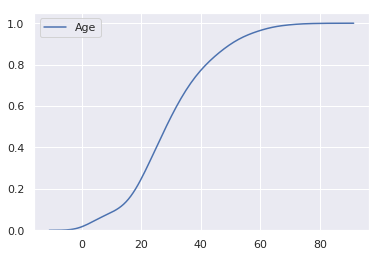

In [33]:
sns.kdeplot(titanic.Age.dropna(), cumulative=True);

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


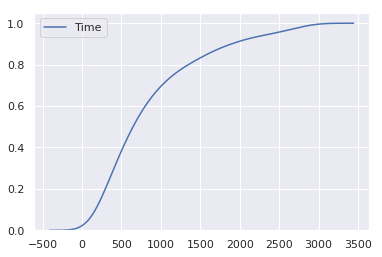

In [34]:
sns.kdeplot(server.Time.dropna(), cumulative=True);

/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/oscar/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


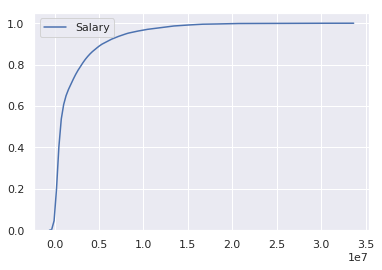

In [35]:
sns.kdeplot(mlb.Salary.dropna(), cumulative=True);